### Reading and Inspecting the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set a professional style for plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')

In [ ]:
# Load the training dataset. All our analysis and model training will be done on this file.
df = pd.read_csv('C:/Mahdi/AI project/HR_project/archive (2)/aug_train.csv')

In [4]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [6]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [7]:
df.shape

(19158, 14)

### #counting values of each category in each column

In [31]:
df["city_development_index"].value_counts()

city_development_index
0.920    5200
0.624    2702
0.910    1533
0.926    1336
0.698     683
         ... 
0.649       4
0.807       4
0.781       3
0.625       3
0.664       1
Name: count, Length: 93, dtype: int64

In [32]:
df["company_size"].value_counts()

company_size
50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: count, dtype: int64

In [33]:
df["education_level"].value_counts()

education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64

### Preprocessing and Exploratory Data Analysis (EDA)

#### Cleaning Experience and Last New Job Columns for train data

In [ ]:
print("Cleaning 'experience' and 'last_new_job' columns...")

# Clean 'experience' column
df['experience'] = df['experience'].replace('>20', '21')
df['experience'] = df['experience'].replace('<1', '0')
df['experience'] = df['experience'].astype(float) # Convert to float to handle NaNs

# Clean 'last_new_job' column
df['last_new_job'] = df['last_new_job'].replace('>4', '5')
df['last_new_job'] = df['last_new_job'].replace('never', '0')
df['last_new_job'] = df['last_new_job'].astype(float)

print("Columns cleaned.")

Cleaning 'experience' and 'last_new_job' columns...
Columns cleaned.


#### Exploratory Data Analysis (EDA)

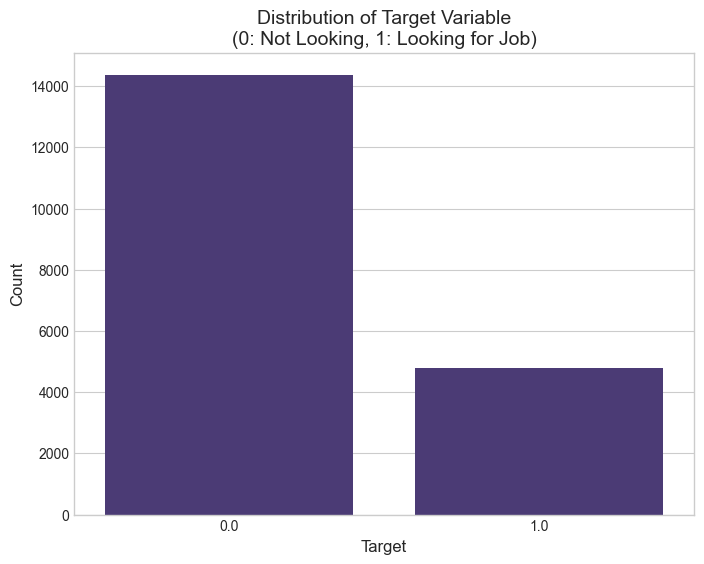

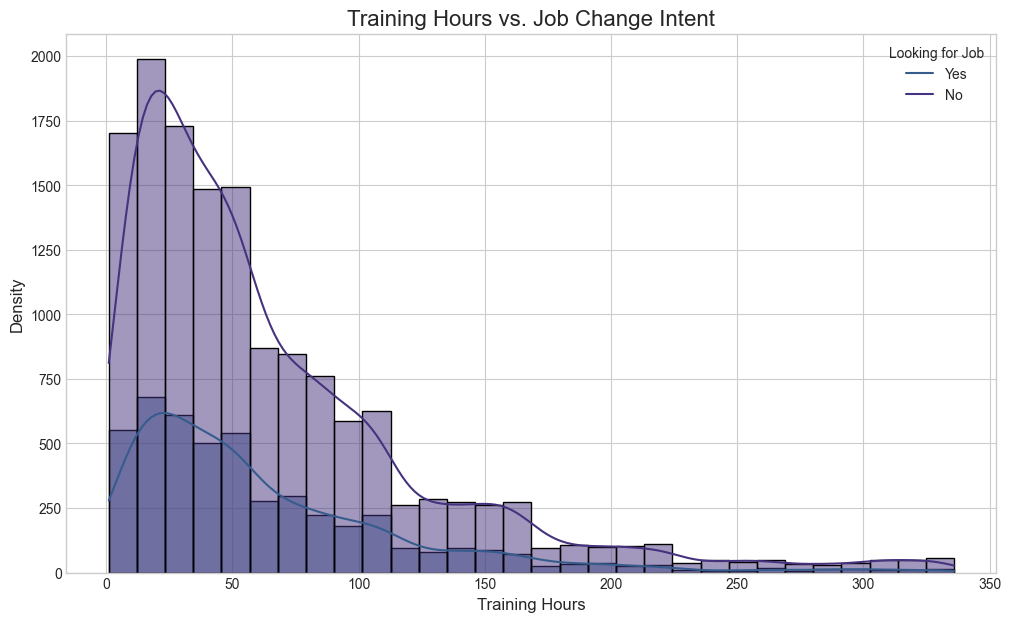

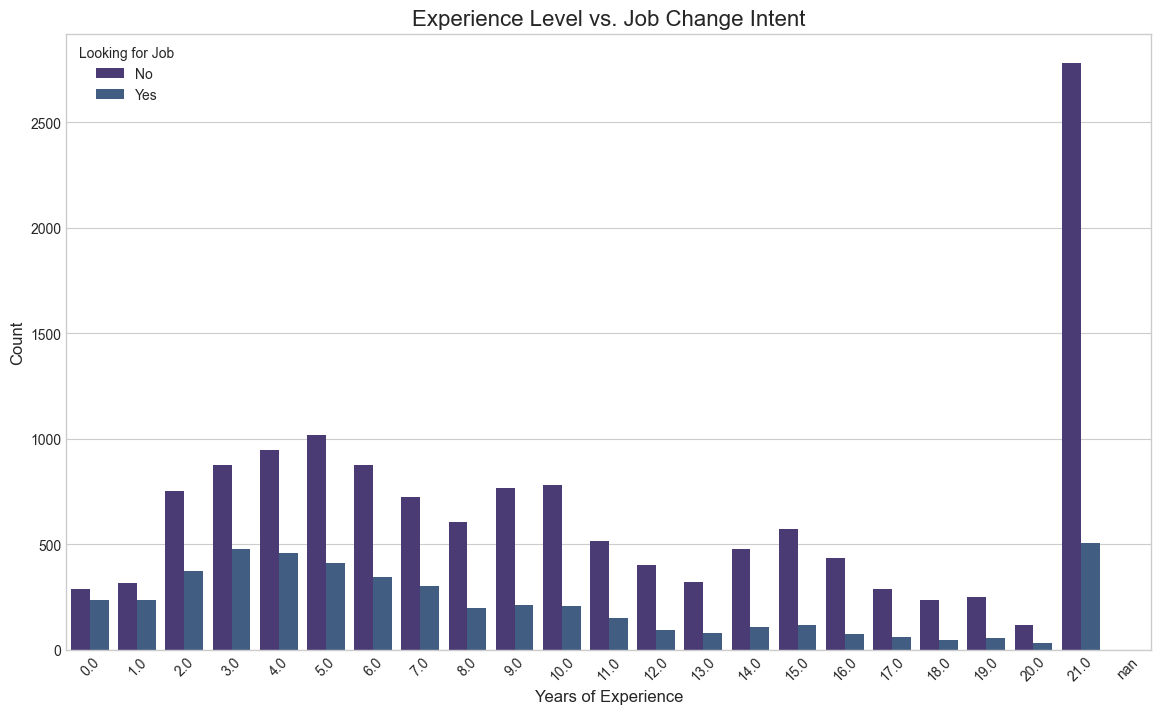

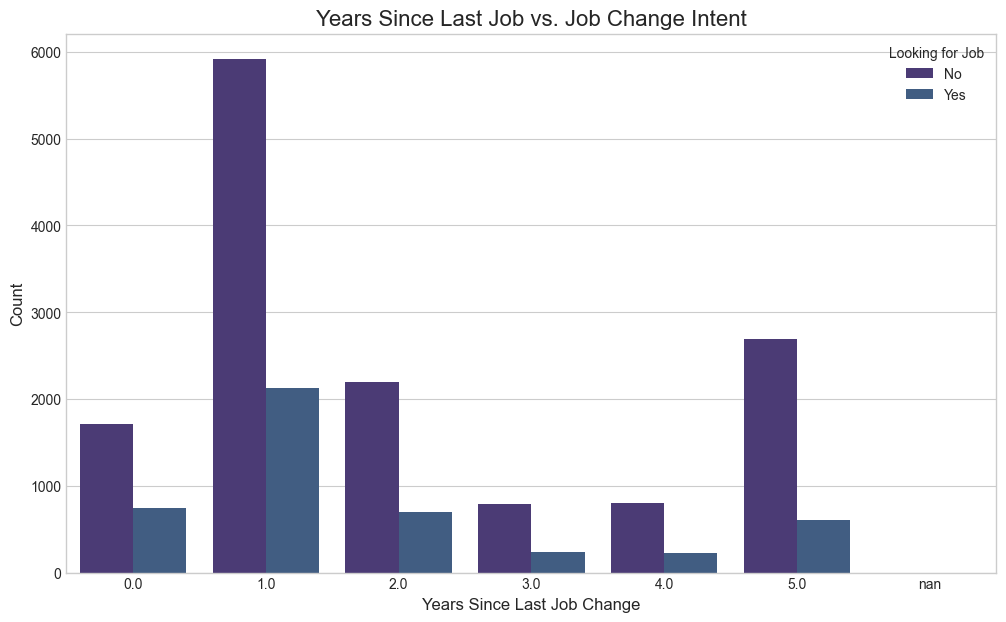

In [ ]:
# 1. Target Variable Distribution (Imbalance Check)
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable\n(0: Not Looking, 1: Looking for Job)', fontsize=14)
plt.xlabel('Target', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# 2. The Training Conundrum
plt.figure(figsize=(12, 7))
sns.histplot(data=df, x='training_hours', hue='target', kde=True, bins=30)
plt.title('Training Hours vs. Job Change Intent', fontsize=16)
plt.xlabel('Training Hours', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Looking for Job', labels=['Yes', 'No'])
plt.show()

# 3. The Experience Factor
plt.figure(figsize=(14, 8))
sns.countplot(x='experience', data=df, hue='target', order=sorted(df['experience'].unique()))
plt.title('Experience Level vs. Job Change Intent', fontsize=16)
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Looking for Job', labels=['No', 'Yes'])
plt.show()

# 4. Company Loyalty
plt.figure(figsize=(12, 7))
sns.countplot(x='last_new_job', data=df, hue='target', order=sorted(df['last_new_job'].unique()))
plt.title('Years Since Last Job vs. Job Change Intent', fontsize=16)
plt.xlabel('Years Since Last Job Change', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Looking for Job', labels=['No', 'Yes'])
plt.show()

#### Encoding Categorical Variables

In [ ]:
# Make a copy to keep the original dataframe intact
df_encoded = df.copy()

# Ordinal Encoding for features with a clear order
ordinal_map = {
    'education_level': {'Primary School': 0, 'High School': 1, 'Graduate': 2, 'Masters': 3, 'Phd': 4},
    'company_size': {'<10': 0, '10/49': 1, '50-99': 2, '100-500': 3, '500-999': 4, '1000-4999': 5, '5000-9999': 6, '10000+': 7}
}
df_encoded['education_level'] = df_encoded['education_level'].map(ordinal_map[('education_level')])
df_encoded['company_size'] = df_encoded['company_size'].map(ordinal_map[('company_size')])

# Label Encoding for binary features
from sklearn.preprocessing import LabelEncoder

label_cols = ['relevent_experience', 'enrolled_university']
for col in label_cols:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# One-Hot Encoding for nominal features (no order)
# We will drop one category to avoid multicollinearity
nominal_cols = ['city', 'gender', 'major_discipline', 'company_type']
df_encoded = pd.get_dummies(df_encoded, columns=nominal_cols, drop_first=True)

print("--- Data after Encoding ---")
df_encoded.head()

--- Data after Encoding ---


,enrollee_id,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,target,...,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,8949,0.920,0,2,2.0,21.0,NaN,1.0,36,1.0,...,False,False,False,False,True,False,False,False,False,False
1,29725,0.776,1,2,2.0,15.0,2.0,5.0,47,0.0,...,False,False,False,False,True,False,False,False,False,True
2,11561,0.624,1,0,2.0,5.0,NaN,0.0,83,0.0,...,False,False,False,False,True,False,False,False,False,False
3,33241,0.789,1,3,2.0,0.0,NaN,0.0,52,1.0,...,True,False,False,False,False,False,False,False,False,True
4,666,0.767,0,2,3.0,21.0,2.0,4.0,8,0.0,...,False,False,False,False,True,True,False,False,False,False


### Building and Comparing Models

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

In [15]:
# 1. Prepare Data for Modeling
# Drop the ID column as it's not a feature
df_encoded = df_encoded.drop('enrollee_id', axis=1)

In [ ]:
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

In [17]:
# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# 3. Scale numerical features

scaler = StandardScaler()
numerical_features = ['city_development_index', 'training_hours', 'experience', 'last_new_job']
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])


#### XGboost

In [19]:
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]
print(f"Calculated scale_pos_weight for XGBoost: {scale_pos_weight:.2f}")

Calculated scale_pos_weight for XGBoost: 3.01


In [20]:
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='aucpr',
                    scale_pos_weight=scale_pos_weight, n_estimators=100,
                    learning_rate=0.1, max_depth=6)
xgb.fit(X_train, y_train)

c:\Users\Mahdi Ghaderi\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:50:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'aucpr'


In [21]:
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_proba_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)

print("--- XGBoost ---")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"ROC AUC Score: {roc_auc_xgb:.4f}")
print("Classification Report:")
print(report_xgb)

c:\Users\Mahdi Ghaderi\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:50:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


--- XGBoost ---
Accuracy: 0.7907
ROC AUC Score: 0.8179
Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.80      0.85      2877
         1.0       0.56      0.77      0.65       955

    accuracy                           0.79      3832
   macro avg       0.74      0.78      0.75      3832
weighted avg       0.82      0.79      0.80      3832



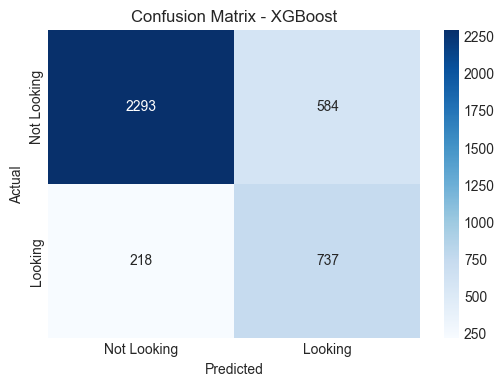

In [22]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Looking', 'Looking'],
            yticklabels=['Not Looking', 'Looking'])
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Random Forest

In [23]:
rf = RandomForestClassifier(random_state=42, n_estimators=150, max_depth=10, class_weight='balanced')
rf.fit(X_train, y_train)

,n_estimators,150
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [24]:
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
report_rf = classification_report(y_test, y_pred_rf)

print("--- Random Forest ---")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"ROC AUC Score: {roc_auc_rf:.4f}")
print("Classification Report:")
print(report_rf)

--- Random Forest ---
Accuracy: 0.7852
ROC AUC Score: 0.8125
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.79      0.85      2877
         1.0       0.55      0.79      0.65       955

    accuracy                           0.79      3832
   macro avg       0.73      0.79      0.75      3832
weighted avg       0.82      0.79      0.80      3832



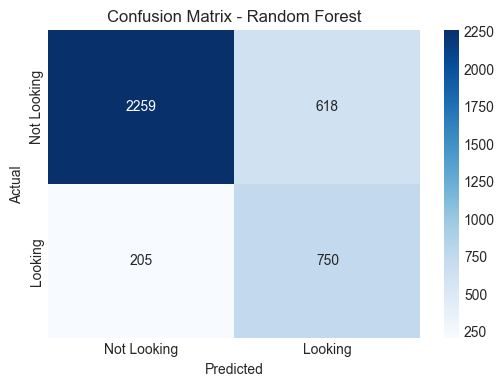

In [25]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Looking', 'Looking'],
            yticklabels=['Not Looking', 'Looking'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Feature Importance - Uncovering the Key Predictors

In [26]:
# --- Feature Importance Analysis (using XGBoost) ---
best_model = xgb

In [27]:
# Get feature importances
importances = best_model.feature_importances_
feature_names = X_train.columns

In [28]:
# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)


C:\Users\Mahdi Ghaderi\AppData\Local\Temp\ipykernel_13188\3791042522.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df.head(15), palette='inferno')


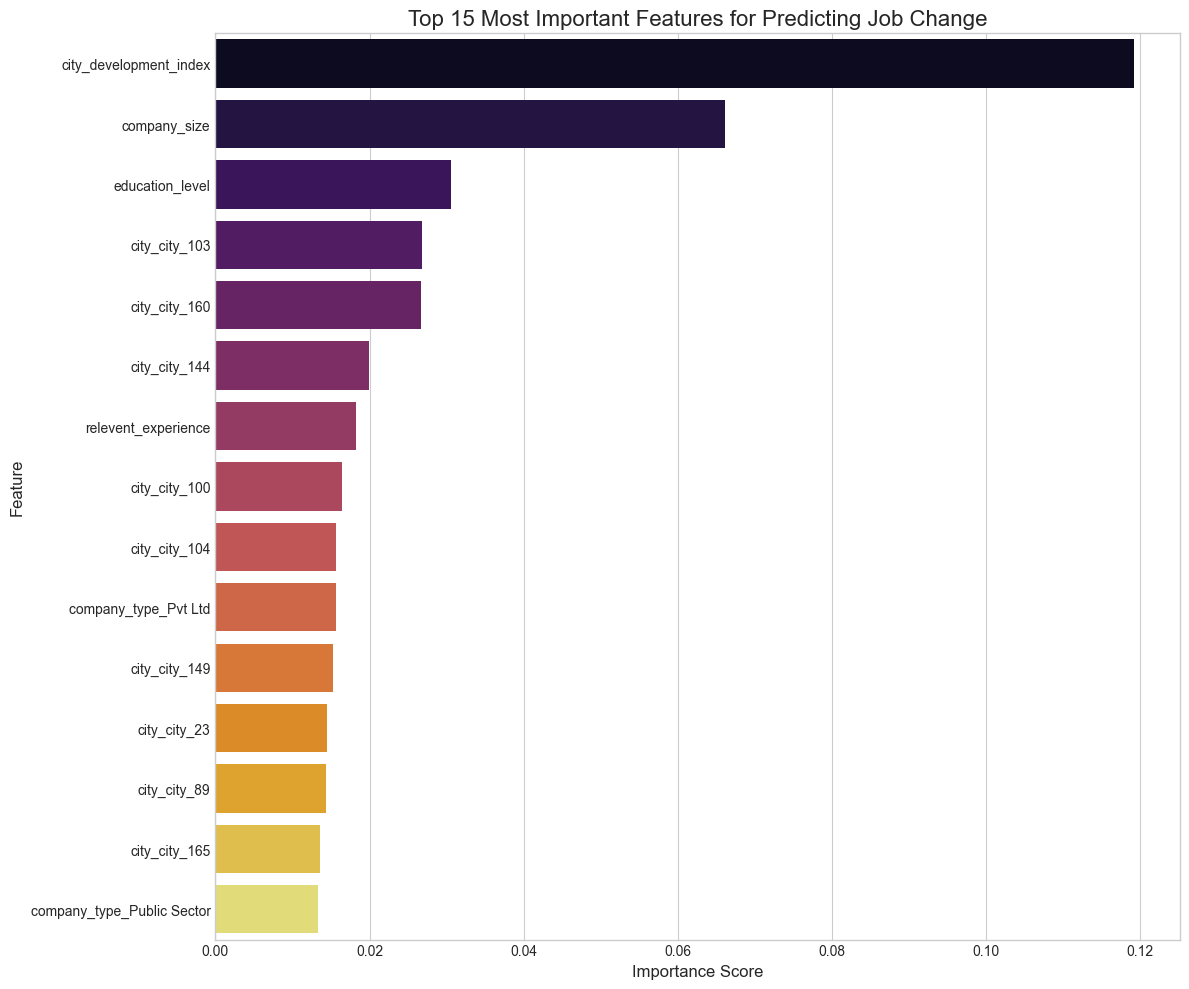

In [29]:
# Plot the top 15 features
plt.figure(figsize=(12, 10))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(15), palette='inferno')
plt.title('Top 15 Most Important Features for Predicting Job Change', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

In [30]:
print("\n--- Top 5 Predictors ---")
print(feature_importance_df.head(5))


--- Top 5 Predictors ---
                   feature  importance
0   city_development_index    0.119214
5             company_size    0.066077
3          education_level    0.030636
12           city_city_103    0.026846
56           city_city_160    0.026712
